# Fish Image Classification 16.12.2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# DATA PATHS
DATA_DIR = "/content/drive/MyDrive/Image project"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

# SAVE PATH (PERMANENT)
MODEL_DIR = "/content/drive/MyDrive/Image project/saved_models"
RESULT_DIR = "/content/drive/MyDrive/Image project/results/cnn_scratch"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(RESULT_DIR, exist_ok=True)


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15   # CNN needs more epochs


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
CLASS_NAMES = list(train_gen.class_indices.keys())


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [ ]:
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
checkpoint = ModelCheckpoint(
    filepath=os.path.join(MODEL_DIR, "cnn_scratch_best.h5"),
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True
)


In [ ]:
model = build_cnn()

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stop],
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3793 - loss: 1.8495 
Epoch 1: val_accuracy improved from -inf to 0.73077, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 2873s 15s/step - accuracy: 0.3799 - loss: 1.8473 - val_accuracy: 0.7308 - val_loss: 0.8170
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.6965 - loss: 0.8642
Epoch 2: val_accuracy improved from 0.73077 to 0.88187, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 548ms/step - accuracy: 0.6966 - loss: 0.8637 - val_accuracy: 0.8819 - val_loss: 0.4094
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8108 - loss: 0.5503
Epoch 3: val_accuracy improved from 0.88187 to 0.91300, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 550ms/step - accuracy: 0.8108 - loss: 0.5502 - val_accuracy: 0.9130 - val_loss: 0.3344
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8626 - loss: 0.4028
Epoch 4: val_accuracy improved from 0.91300 to 0.92491, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 111s 564ms/step - accuracy: 0.8626 - loss: 0.4027 - val_accuracy: 0.9249 - val_loss: 0.2414
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8785 - loss: 0.3532
Epoch 5: val_accuracy did not improve from 0.92491
195/195 ━━━━━━━━━━━━━━━━━━━━ 103s 528ms/step - accuracy: 0.8785 - loss: 0.3533 - val_accuracy: 0.9212 - val_loss: 0.2725
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.8930 - loss: 0.3206
Epoch 6: val_accuracy improved from 0.92491 to 0.95971, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 525ms/step - accuracy: 0.8930 - loss: 0.3206 - val_accuracy: 0.9597 - val_loss: 0.1698
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.9090 - loss: 0.2493
Epoch 7: val_accuracy did not improve from 0.95971
195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 522ms/step - accuracy: 0.9090 - loss: 0.2494 - val_accuracy: 0.9570 - val_loss: 0.1547
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9282 - loss: 0.2126
Epoch 8: val_accuracy improved from 0.95971 to 0.96429, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 104s 535ms/step - accuracy: 0.9283 - loss: 0.2126 - val_accuracy: 0.9643 - val_loss: 0.1495
Epoch 9/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.9448 - loss: 0.1645
Epoch 9: val_accuracy improved from 0.96429 to 0.96795, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 532ms/step - accuracy: 0.9447 - loss: 0.1645 - val_accuracy: 0.9679 - val_loss: 0.1337
Epoch 10/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.9525 - loss: 0.1465
Epoch 10: val_accuracy did not improve from 0.96795
195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 521ms/step - accuracy: 0.9524 - loss: 0.1467 - val_accuracy: 0.9670 - val_loss: 0.1154
Epoch 11/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9349 - loss: 0.1946
Epoch 11: val_accuracy did not improve from 0.96795
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 508ms/step - accuracy: 0.9349 - loss: 0.1946 - val_accuracy: 0.9231 - val_loss: 0.2078
Epoch 12/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.9425 - loss: 0.1680
Epoch 12: val_accuracy improved from 0.96795 to 0.98260, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 522ms/step - accuracy: 0.9426 - loss: 0.1679 - val_accuracy: 0.9826 - val_loss: 0.0853
Epoch 13/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.9591 - loss: 0.1266
Epoch 13: val_accuracy did not improve from 0.98260
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 542ms/step - accuracy: 0.9590 - loss: 0.1266 - val_accuracy: 0.9542 - val_loss: 0.1489
Epoch 14/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.9485 - loss: 0.1553
Epoch 14: val_accuracy improved from 0.98260 to 0.98626, saving model to /content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 544ms/step - accuracy: 0.9486 - loss: 0.1551 - val_accuracy: 0.9863 - val_loss: 0.0670
Epoch 15/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9463 - loss: 0.1745
Epoch 15: val_accuracy did not improve from 0.98626
195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 520ms/step - accuracy: 0.9464 - loss: 0.1744 - val_accuracy: 0.9817 - val_loss: 0.0982


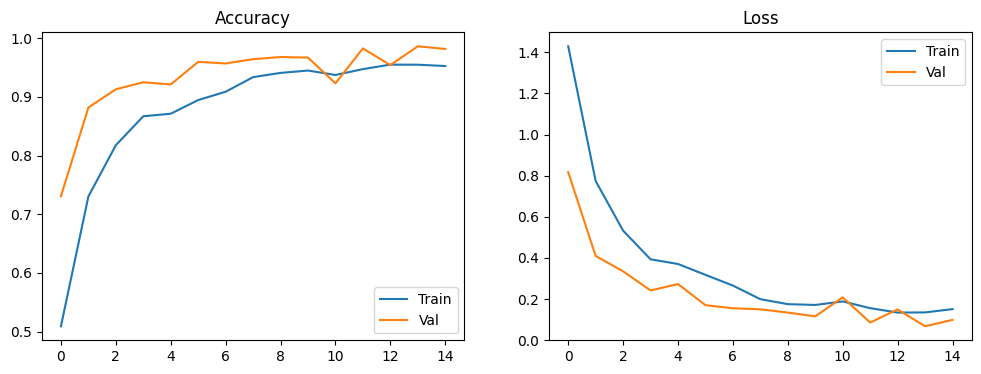

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.savefig(os.path.join(RESULT_DIR, "training_curves.png"))
plt.show()


In [ ]:
best_model = tf.keras.models.load_model(
    os.path.join(MODEL_DIR, "cnn_scratch_best.h5")
)

preds = best_model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.96      0.99      0.98       187
                animal fish bass       0.60      0.30      0.40        10
   fish sea_food black_sea_sprat       1.00      1.00      1.00       105
   fish sea_food gilt_head_bream       0.97      1.00      0.98        94
   fish sea_food hourse_mackerel       1.00      1.00      1.00        97
        fish sea_food red_mullet       0.98      1.00      0.99        90
     fish sea_food red_sea_bream       1.00      0.97      0.99       113
          fish sea_food sea_bass       1.00      0.99      0.99        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       1.00      0.98      0.99       101
             fish sea_food trout       0.99      1.00      0.99        98

                        accuracy                           0.99      

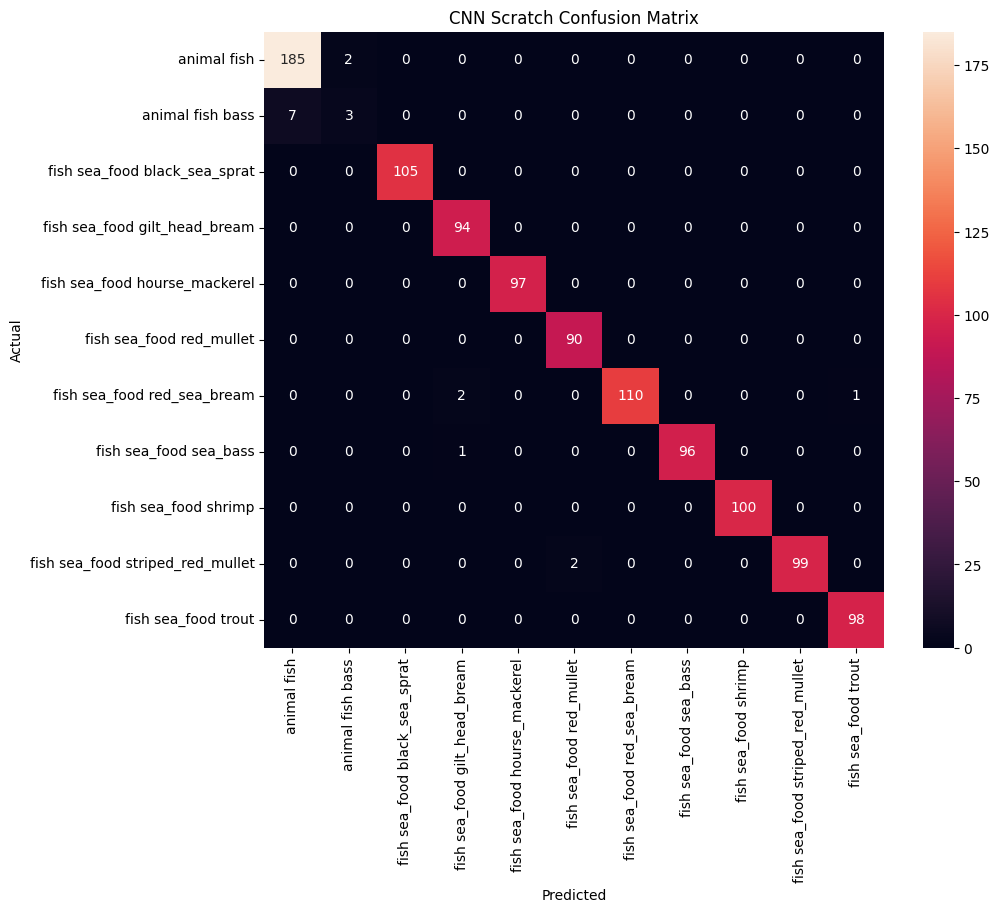

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=CLASS_NAMES,
            yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Scratch Confusion Matrix")
plt.savefig(os.path.join(RESULT_DIR, "confusion_matrix.png"))
plt.show()


# Fish Image Classification 17.12.2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


Mounted at /content/drive


In [ ]:
DATA_DIR = "/content/drive/MyDrive/Image project"
TRAIN_DIR = DATA_DIR + "/train"
VAL_DIR   = DATA_DIR + "/val"

OUTPUT_DIR = DATA_DIR + "/output_models/vgg16"
os.makedirs(OUTPUT_DIR, exist_ok=True)

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
print("Classes:", train_gen.class_indices)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # transfer learning

x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.models.Model(base_model.input, output)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,140,299 (80.64 MB)

 Trainable params: 6,425,611 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
checkpoint = ModelCheckpoint(
    OUTPUT_DIR + "/vgg16_best.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

callbacks = [
    checkpoint,
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3)
]


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.4630 - loss: 2.0815 
Epoch 1: val_accuracy improved from -inf to 0.90934, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 2615s 13s/step - accuracy: 0.4638 - loss: 2.0774 - val_accuracy: 0.9093 - val_loss: 0.3986 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.7960 - loss: 0.5989
Epoch 2: val_accuracy improved from 0.90934 to 0.95971, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 542ms/step - accuracy: 0.7961 - loss: 0.5987 - val_accuracy: 0.9597 - val_loss: 0.1955 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8680 - loss: 0.3878
Epoch 3: val_accuracy improved from 0.95971 to 0.97436, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 547ms/step - accuracy: 0.8680 - loss: 0.3877 - val_accuracy: 0.9744 - val_loss: 0.1333 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.8859 - loss: 0.3386
Epoch 4: val_accuracy did not improve from 0.97436
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 545ms/step - accuracy: 0.8859 - loss: 0.3387 - val_accuracy: 0.9652 - val_loss: 0.1235 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9099 - loss: 0.2890
Epoch 5: val_accuracy improved from 0.97436 to 0.97711, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 105s 538ms/step - accuracy: 0.9098 - loss: 0.2890 - val_accuracy: 0.9771 - val_loss: 0.0851 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.9176 - loss: 0.2279
Epoch 6: val_accuracy improved from 0.97711 to 0.97894, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 108s 553ms/step - accuracy: 0.9176 - loss: 0.2279 - val_accuracy: 0.9789 - val_loss: 0.0799 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9126 - loss: 0.2379
Epoch 7: val_accuracy did not improve from 0.97894
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 546ms/step - accuracy: 0.9126 - loss: 0.2379 - val_accuracy: 0.9780 - val_loss: 0.0907 - learning_rate: 0.0010
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.9238 - loss: 0.2148
Epoch 8: val_accuracy improved from 0.97894 to 0.98260, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 546ms/step - accuracy: 0.9237 - loss: 0.2149 - val_accuracy: 0.9826 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9297 - loss: 0.2093
Epoch 9: val_accuracy improved from 0.98260 to 0.98352, saving model to /content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 564ms/step - accuracy: 0.9297 - loss: 0.2093 - val_accuracy: 0.9835 - val_loss: 0.0486 - learning_rate: 0.0010
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9267 - loss: 0.2033
Epoch 10: val_accuracy did not improve from 0.98352
195/195 ━━━━━━━━━━━━━━━━━━━━ 107s 546ms/step - accuracy: 0.9266 - loss: 0.2034 - val_accuracy: 0.9835 - val_loss: 0.0612 - learning_rate: 0.0010


In [ ]:
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.savefig(OUTPUT_DIR + "/accuracy.png")
plt.close()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.savefig(OUTPUT_DIR + "/loss.png")
plt.close()


In [ ]:
best_model = tf.keras.models.load_model(
    OUTPUT_DIR + "/vgg16_best.h5"
)

pred_probs = best_model.predict(val_gen)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = val_gen.classes


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step


In [ ]:
report = classification_report(true_classes, pred_classes, output_dict=True)
print(classification_report(true_classes, pred_classes))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       187
           1       1.00      0.20      0.33        10
           2       0.97      0.98      0.98       105
           3       1.00      0.98      0.99        94
           4       0.99      1.00      0.99        97
           5       0.98      0.99      0.98        90
           6       0.98      1.00      0.99       113
           7       0.99      0.97      0.98        97
           8       1.00      1.00      1.00       100
           9       0.99      0.99      0.99       101
          10       1.00      1.00      1.00        98

    accuracy                           0.98      1092
   macro avg       0.99      0.92      0.93      1092
weighted avg       0.98      0.98      0.98      1092



In [ ]:
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig(OUTPUT_DIR + "/confusion_matrix.png")
plt.close()


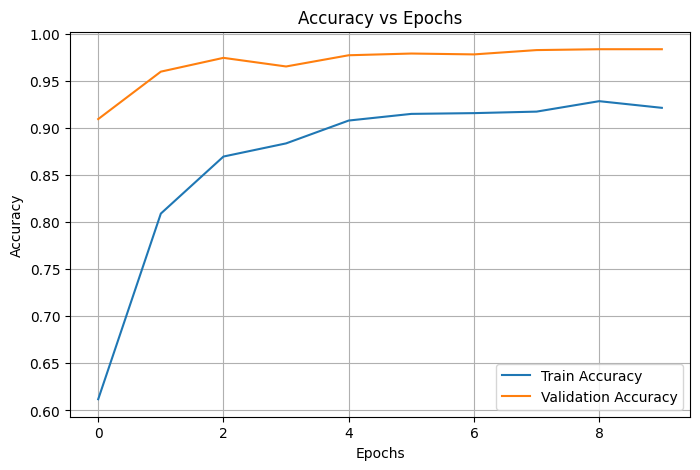

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(OUTPUT_DIR + "/accuracy_curve.png")
plt.show()


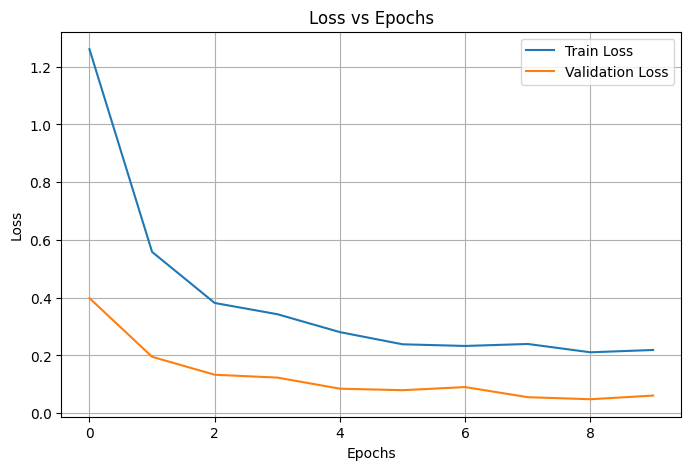

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig(OUTPUT_DIR + "/loss_curve.png")
plt.show()


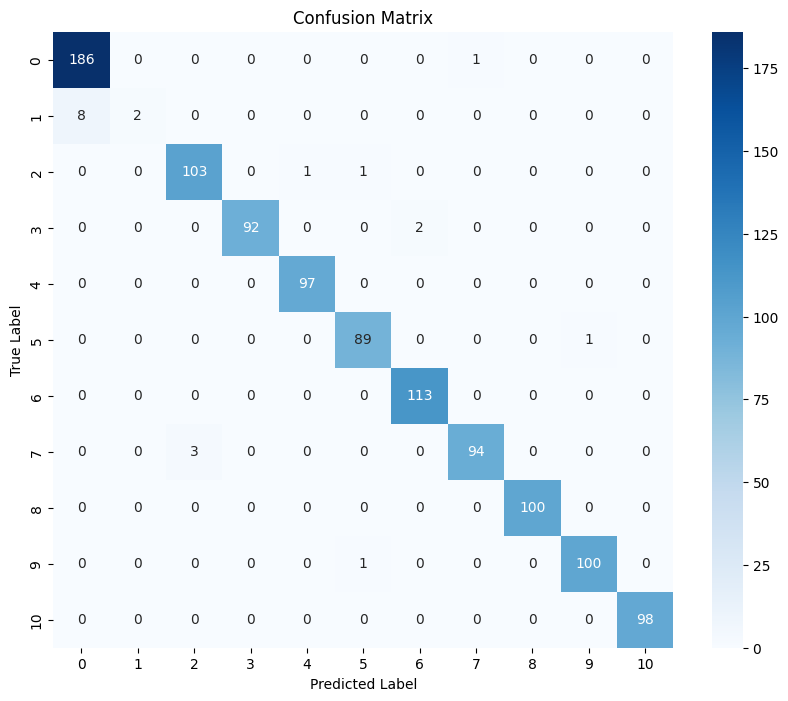

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig(OUTPUT_DIR + "/confusion_matrix.png")
plt.show()


<Figure size 1200x600 with 0 Axes>

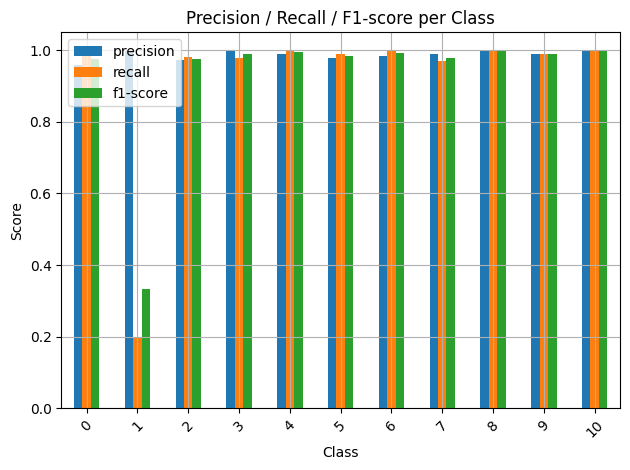

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

report = classification_report(
    true_classes,
    pred_classes,
    output_dict=True
)

df = pd.DataFrame(report).transpose()
df = df.iloc[:-3]  # remove accuracy, macro, weighted avg

plt.figure(figsize=(12,6))
df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Precision / Recall / F1-score per Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT_DIR + "/precision_recall_f1.png")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# resnet50.py

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix

# ---------------- PATHS ----------------
DATA_DIR = "/content/drive/MyDrive/Image project"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

OUTPUT_ROOT = "/content/output_models"
OUT_DIR = os.path.join(OUTPUT_ROOT, "resnet50")
os.makedirs(OUT_DIR, exist_ok=True)

# ---------------- PARAMS ----------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10   # pre-trained → fewer epochs

# ---------------- DATA ----------------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_gen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_generator.num_classes

# ---------------- CALLBACKS ----------------
ckpt_path = os.path.join(OUT_DIR, "resnet50_best.h5")

callbacks = [
    ModelCheckpoint(ckpt_path, monitor="val_accuracy", save_best_only=True, verbose=1),
    EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3)
]

# ---------------- MODEL ----------------
base = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling="avg"
)
base.trainable = False

x = layers.Dense(256, activation="relu")(base.output)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(base.input, outputs)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# ---------------- TRAIN ----------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ---------------- PLOTS ----------------
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.savefig(os.path.join(OUT_DIR, "accuracy.png"))
plt.close()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.savefig(os.path.join(OUT_DIR, "loss.png"))
plt.close()

# ---------------- EVALUATION ----------------
best = tf.keras.models.load_model(ckpt_path)

preds = best.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=labels)
with open(os.path.join(OUT_DIR, "resnet50_report.txt"), "w") as f:
    f.write(report)

cm = confusion_matrix(y_true, y_pred)
np.savetxt(os.path.join(OUT_DIR, "resnet50_confusion_matrix.txt"), cm, fmt="%d")

print(report)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.1539 - loss: 2.3569 
Epoch 1: val_accuracy improved from -inf to 0.17033, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 4366s 22s/step - accuracy: 0.1540 - loss: 2.3566 - val_accuracy: 0.1703 - val_loss: 2.1964 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1951 - loss: 2.2090
Epoch 2: val_accuracy improved from 0.17033 to 0.17491, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1299s 7s/step - accuracy: 0.1952 - loss: 2.2089 - val_accuracy: 0.1749 - val_loss: 2.1264 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2231 - loss: 2.1055
Epoch 3: val_accuracy improved from 0.17491 to 0.27198, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1278s 7s/step - accuracy: 0.2231 - loss: 2.1055 - val_accuracy: 0.2720 - val_loss: 2.0291 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2454 - loss: 2.0612
Epoch 4: val_accuracy did not improve from 0.27198
195/195 ━━━━━━━━━━━━━━━━━━━━ 1307s 7s/step - accuracy: 0.2454 - loss: 2.0611 - val_accuracy: 0.2619 - val_loss: 1.9801 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2652 - loss: 2.0098
Epoch 5: val_accuracy improved from 0.27198 to 0.29121, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1390s 7s/step - accuracy: 0.2652 - loss: 2.0099 - val_accuracy: 0.2912 - val_loss: 1.9306 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2762 - loss: 1.9801
Epoch 6: val_accuracy improved from 0.29121 to 0.31593, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1392s 7s/step - accuracy: 0.2762 - loss: 1.9801 - val_accuracy: 0.3159 - val_loss: 1.9415 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2725 - loss: 1.9889
Epoch 7: val_accuracy improved from 0.31593 to 0.36081, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1387s 7s/step - accuracy: 0.2725 - loss: 1.9888 - val_accuracy: 0.3608 - val_loss: 1.8840 - learning_rate: 0.0010
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2889 - loss: 1.9307
Epoch 8: val_accuracy did not improve from 0.36081
195/195 ━━━━━━━━━━━━━━━━━━━━ 1387s 7s/step - accuracy: 0.2889 - loss: 1.9307 - val_accuracy: 0.3498 - val_loss: 1.8725 - learning_rate: 0.0010
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2878 - loss: 1.9401
Epoch 9: val_accuracy improved from 0.36081 to 0.39286, saving model to /content/output_models/resnet50/resnet50_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1389s 7s/step - accuracy: 0.2878 - loss: 1.9400 - val_accuracy: 0.3929 - val_loss: 1.8347 - learning_rate: 0.0010
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3041 - loss: 1.9099
Epoch 10: val_accuracy did not improve from 0.39286
195/195 ━━━━━━━━━━━━━━━━━━━━ 1386s 7s/step - accuracy: 0.3041 - loss: 1.9098 - val_accuracy: 0.3782 - val_loss: 1.8155 - learning_rate: 0.0010


35/35 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step
                                  precision    recall  f1-score   support

                     animal fish       0.50      0.73      0.59       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.26      0.24      0.25       105
   fish sea_food gilt_head_bream       0.00      0.00      0.00        94
   fish sea_food hourse_mackerel       0.34      0.61      0.44        97
        fish sea_food red_mullet       0.37      0.34      0.36        90
     fish sea_food red_sea_bream       0.50      0.47      0.49       113
          fish sea_food sea_bass       0.00      0.00      0.00        97
            fish sea_food shrimp       0.38      0.68      0.49       100
fish sea_food striped_red_mullet       0.00      0.00      0.00       101
             fish sea_food trout       0.31      0.58      0.41        98

                        accuracy                           0.39      1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Project Workings 18.12.2025

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ==============================
# COMMON SETUP (RUN ONCE)
# ==============================

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# ------------------
# PATHS
# ------------------
DATA_DIR = "/content/drive/MyDrive/Image project"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

MODEL_ROOT = "/content/drive/MyDrive/Image project/output_models"
os.makedirs(MODEL_ROOT, exist_ok=True)

# ------------------
# PARAMETERS
# ------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# ------------------
# DATA GENERATORS
# ------------------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_data.num_classes
CLASS_NAMES = list(train_data.class_indices.keys())

print("Classes:", CLASS_NAMES)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
# ==============================
# COMMON UTIL FUNCTIONS
# ==============================

def get_callbacks(model_dir, model_name):
    os.makedirs(model_dir, exist_ok=True)
    path = os.path.join(model_dir, f"{model_name}_best.h5")

    return [
        ModelCheckpoint(path, monitor="val_accuracy", save_best_only=True, verbose=1),
        EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.3)
    ], path


def plot_history(history, model_dir, model_name):
    # Accuracy
    plt.figure()
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title(f"{model_name} Accuracy")
    plt.savefig(os.path.join(model_dir, f"{model_name}_accuracy.png"))
    plt.close()

    # Loss
    plt.figure()
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title(f"{model_name} Loss")
    plt.savefig(os.path.join(model_dir, f"{model_name}_loss.png"))
    plt.close()


def evaluate_model(model, model_dir, model_name):
    preds = model.predict(val_data)
    y_pred = np.argmax(preds, axis=1)
    y_true = val_data.classes

    # Metrics
    report = classification_report(y_true, y_pred, target_names=CLASS_NAMES)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    with open(os.path.join(model_dir, f"{model_name}_report.txt"), "w") as f:
        f.write(report)
        f.write(f"\nPrecision: {precision}")
        f.write(f"\nRecall: {recall}")
        f.write(f"\nF1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=CLASS_NAMES,
                yticklabels=CLASS_NAMES)
    plt.title(f"{model_name} Confusion Matrix")
    plt.savefig(os.path.join(model_dir, f"{model_name}_confusion_matrix.png"))
    plt.close()

    print(f"Evaluation completed for {model_name}")


In [ ]:
# ==============================
# MOBILENET
# ==============================

from tensorflow.keras.applications import MobileNet

model_name = "mobilenet"
model_dir = os.path.join(MODEL_ROOT, model_name)

base = MobileNet(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(base.output)
x = tf.keras.layers.Dense(256, activation="relu")(x)
output = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(base.input, output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

callbacks, path = get_callbacks(model_dir, model_name)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks
)

model = tf.keras.models.load_model(path)
plot_history(history, model_dir, model_name)
evaluate_model(model, model_dir, model_name)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.7998 - loss: 0.6757 
Epoch 1: val_accuracy improved from -inf to 0.99176, saving model to /content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 2565s 13s/step - accuracy: 0.8003 - loss: 0.6738 - val_accuracy: 0.9918 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9850 - loss: 0.0535
Epoch 2: val_accuracy did not improve from 0.99176
195/195 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.9850 - loss: 0.0535 - val_accuracy: 0.9762 - val_loss: 0.0625 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9908 - loss: 0.0322
Epoch 3: val_accuracy did not improve from 0.99176
195/195 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.9908 - loss: 0.0322 - val_accuracy: 0.9707 - val_loss: 0.0677 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9933 - loss: 0.0199
Epoch 4: val_accuracy improved from 0.99176 to 0.99817, saving model to /content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9982 - val_loss: 0.0086 - learning_rate: 3.0000e-04
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9982 - loss: 0.0095
Epoch 5: val_accuracy did not improve from 0.99817
195/195 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.9982 - loss: 0.0095 - val_accuracy: 0.9982 - val_loss: 0.0091 - learning_rate: 3.0000e-04
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9987 - loss: 0.0098
Epoch 6: val_accuracy improved from 0.99817 to 0.99908, saving model to /content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.9987 - loss: 0.0098 - val_accuracy: 0.9991 - val_loss: 0.0071 - learning_rate: 3.0000e-04
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9977 - loss: 0.0115
Epoch 7: val_accuracy did not improve from 0.99908
195/195 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.9977 - loss: 0.0115 - val_accuracy: 0.9945 - val_loss: 0.0124 - learning_rate: 3.0000e-04
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9977 - loss: 0.0108
Epoch 8: val_accuracy did not improve from 0.99908
195/195 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.9977 - loss: 0.0108 - val_accuracy: 0.9973 - val_loss: 0.0095 - learning_rate: 3.0000e-04
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9983 - loss: 0.0073
Epoch 9: val_accuracy did not improve from 0.99908
195/195 ━━━━━━━━━━━━━━━━━━━━ 478s 2s/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9982 - val_loss: 0.0081 - learning_rate: 9.0000e-05
Epoch 10

35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
Evaluation completed for mobilenet


In [ ]:
import tensorflow as tf

model_path = "/content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5"
model = tf.keras.models.load_model(model_path)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,494,093 (13.33 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf

model_path = "/content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5"
model = tf.keras.models.load_model(model_path)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,494,093 (13.33 MB)

 Trainable params: 265,227 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5"
DATA_DIR   = "/content/drive/MyDrive/Image project/val"
OUT_DIR    = "/content/drive/MyDrive/Image project/evaluation/mobilenet"

os.makedirs(OUT_DIR, exist_ok=True)


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

class_names = list(val_gen.class_indices.keys())


Found 1092 images belonging to 11 classes.


In [ ]:
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully")


Model loaded successfully


In [ ]:
loss, accuracy = model.evaluate(val_gen, verbose=1)

print(f"Loss     : {loss:.4f}")
print(f"Accuracy : {accuracy:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9985 - loss: 0.0091
Loss     : 0.0071
Accuracy : 0.9991


In [ ]:
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

report = classification_report(
    y_true, y_pred,
    target_names=class_names,
    digits=4
)

print(report)

with open(os.path.join(OUT_DIR, "classification_report.txt"), "w") as f:
    f.write(report)


35/35 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
                                  precision    recall  f1-score   support

                     animal fish     0.9947    1.0000    0.9973       187
                animal fish bass     1.0000    0.9000    0.9474        10
   fish sea_food black_sea_sprat     1.0000    1.0000    1.0000       105
   fish sea_food gilt_head_bream     1.0000    1.0000    1.0000        94
   fish sea_food hourse_mackerel     1.0000    1.0000    1.0000        97
        fish sea_food red_mullet     1.0000    1.0000    1.0000        90
     fish sea_food red_sea_bream     1.0000    1.0000    1.0000       113
          fish sea_food sea_bass     1.0000    1.0000    1.0000        97
            fish sea_food shrimp     1.0000    1.0000    1.0000       100
fish sea_food striped_red_mullet     1.0000    1.0000    1.0000       101
             fish sea_food trout     1.0000    1.0000    1.0000        98

                        accuracy                         0.9991      10

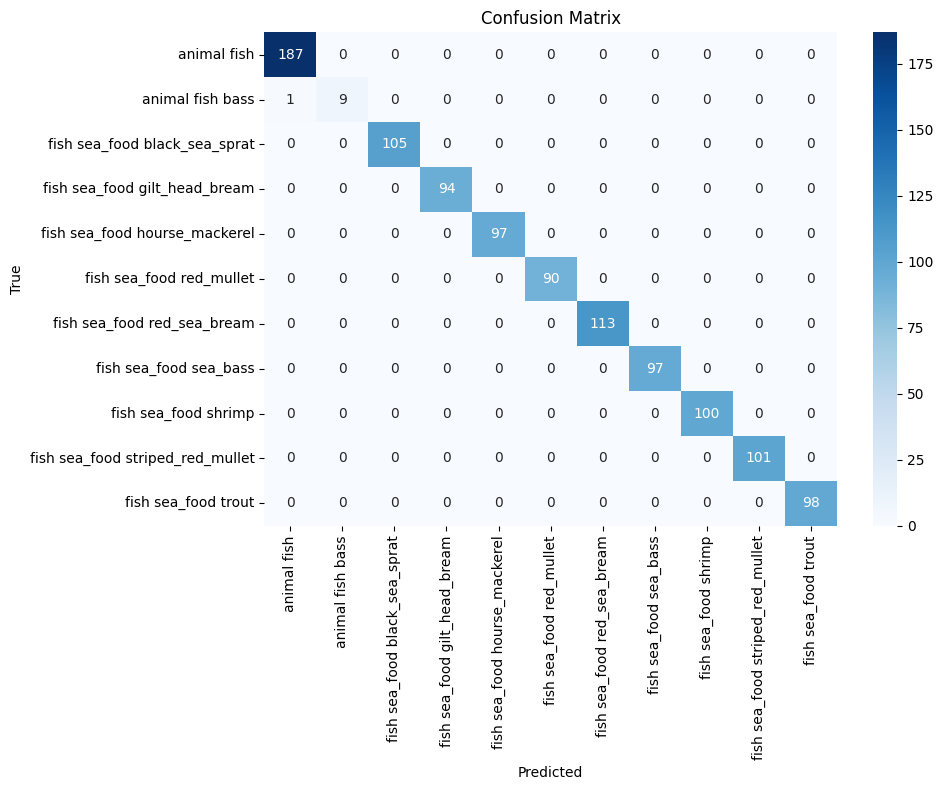

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.savefig(os.path.join(OUT_DIR, "confusion_matrix.png"))
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_DIR = "/content/drive/MyDrive/Image project"
VAL_DIR  = os.path.join(DATA_DIR, "val")

MODEL_PATH = "/content/drive/MyDrive/Image project/models/mobilenet_best.h5"


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

class_names = list(val_generator.class_indices.keys())
print("Classes:", class_names)


Found 1092 images belonging to 11 classes.
Classes: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
y_true = val_generator.classes

y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step


In [ ]:
report = classification_report(
    y_true,
    y_pred,
    target_names=class_names
)

print(report)

# Save report to Drive
REPORT_PATH = "/content/drive/MyDrive/Image project/reports/mobilenet_report.txt"
os.makedirs(os.path.dirname(REPORT_PATH), exist_ok=True)

with open(REPORT_PATH, "w") as f:
    f.write(report)

print("Report saved to Drive")


                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       187
                animal fish bass       1.00      0.90      0.95        10
   fish sea_food black_sea_sprat       1.00      1.00      1.00       105
   fish sea_food gilt_head_bream       1.00      1.00      1.00        94
   fish sea_food hourse_mackerel       1.00      1.00      1.00        97
        fish sea_food red_mullet       1.00      1.00      1.00        90
     fish sea_food red_sea_bream       1.00      1.00      1.00       113
          fish sea_food sea_bass       1.00      1.00      1.00        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       1.00      1.00      1.00       101
             fish sea_food trout       1.00      1.00      1.00        98

                        accuracy                           1.00      1092
                       macro avg    

In [ ]:
import os

# CHANGE ONLY IF YOUR FOLDER NAME IS DIFFERENT
DATA_DIR = "/content/drive/MyDrive/Image project"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

# OUTPUT LOCATION (SAFE)
OUT_DIR = "/content/drive/MyDrive/Image project/inceptionv3"
os.makedirs(OUT_DIR, exist_ok=True)

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 8   # pre-trained → fewer epochs


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_data.num_classes
print("Classes:", train_data.class_indices)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [ ]:
#STEP 3 — Build InceptionV3 Model
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # important

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(base_model.input, outputs)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,330,155 (85.18 MB)

 Trainable params: 527,371 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

MODEL_PATH = os.path.join(OUT_DIR, "inceptionv3_best.h5")

callbacks = [
    ModelCheckpoint(
        MODEL_PATH,
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=2,
        verbose=1
    )
]


In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6438 - loss: 1.1640
Epoch 1: val_accuracy improved from -inf to 0.94048, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1071s 5s/step - accuracy: 0.6446 - loss: 1.1614 - val_accuracy: 0.9405 - val_loss: 0.1935 - learning_rate: 0.0010
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8990 - loss: 0.2974
Epoch 2: val_accuracy improved from 0.94048 to 0.95055, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1035s 5s/step - accuracy: 0.8991 - loss: 0.2973 - val_accuracy: 0.9505 - val_loss: 0.1573 - learning_rate: 0.0010
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9213 - loss: 0.2394
Epoch 3: val_accuracy improved from 0.95055 to 0.95696, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1043s 5s/step - accuracy: 0.9214 - loss: 0.2393 - val_accuracy: 0.9570 - val_loss: 0.1293 - learning_rate: 0.0010
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9473 - loss: 0.1669
Epoch 4: val_accuracy improved from 0.95696 to 0.96612, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1094s 6s/step - accuracy: 0.9473 - loss: 0.1669 - val_accuracy: 0.9661 - val_loss: 0.1037 - learning_rate: 0.0010
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9436 - loss: 0.1563
Epoch 5: val_accuracy improved from 0.96612 to 0.97253, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1039s 5s/step - accuracy: 0.9436 - loss: 0.1563 - val_accuracy: 0.9725 - val_loss: 0.0776 - learning_rate: 0.0010
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9516 - loss: 0.1452
Epoch 6: val_accuracy improved from 0.97253 to 0.97527, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1045s 5s/step - accuracy: 0.9515 - loss: 0.1453 - val_accuracy: 0.9753 - val_loss: 0.0755 - learning_rate: 0.0010
Epoch 7/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9532 - loss: 0.1384
Epoch 7: val_accuracy improved from 0.97527 to 0.97711, saving model to /content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 1038s 5s/step - accuracy: 0.9532 - loss: 0.1384 - val_accuracy: 0.9771 - val_loss: 0.0726 - learning_rate: 0.0010
Epoch 8/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9533 - loss: 0.1345
Epoch 8: val_accuracy did not improve from 0.97711
195/195 ━━━━━━━━━━━━━━━━━━━━ 1042s 5s/step - accuracy: 0.9533 - loss: 0.1344 - val_accuracy: 0.9744 - val_loss: 0.0639 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 7.


In [ ]:
import numpy as np

np.save(
    os.path.join(OUT_DIR, "inceptionv3_history.npy"),
    history.history
)


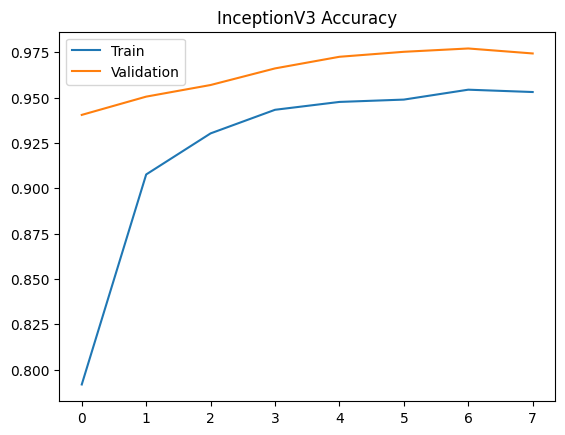

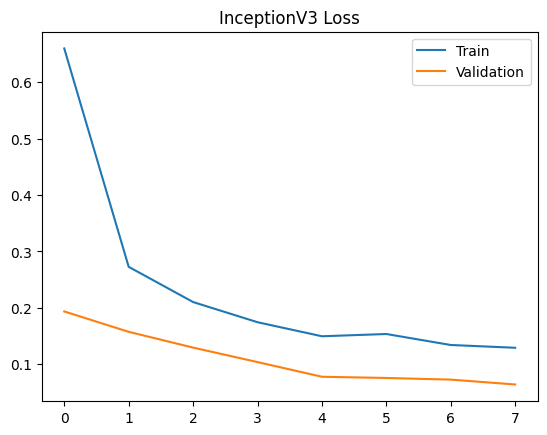

In [ ]:
import matplotlib.pyplot as plt

history = np.load(
    os.path.join(OUT_DIR, "inceptionv3_history.npy"),
    allow_pickle=True
).item()

plt.figure()
plt.plot(history["accuracy"], label="Train")
plt.plot(history["val_accuracy"], label="Validation")
plt.title("InceptionV3 Accuracy")
plt.legend()
plt.savefig(os.path.join(OUT_DIR, "accuracy.png"))
plt.show()

plt.figure()
plt.plot(history["loss"], label="Train")
plt.plot(history["val_loss"], label="Validation")
plt.title("InceptionV3 Loss")
plt.legend()
plt.savefig(os.path.join(OUT_DIR, "loss.png"))
plt.show()


In [ ]:
model = tf.keras.models.load_model(MODEL_PATH)

val_loss, val_acc = model.evaluate(val_data)
print("Validation Accuracy:", val_acc)


35/35 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.9757 - loss: 0.0804
Validation Accuracy: 0.9771062135696411


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)

print(classification_report(
    y_true,
    y_pred,
    target_names=val_data.class_indices.keys()
))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

np.savetxt(os.path.join(OUT_DIR, "confusion_matrix.txt"), cm, fmt="%d")


35/35 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step
                                  precision    recall  f1-score   support

                     animal fish       0.94      1.00      0.97       187
                animal fish bass       1.00      0.10      0.18        10
   fish sea_food black_sea_sprat       0.99      0.99      0.99       105
   fish sea_food gilt_head_bream       0.95      0.99      0.97        94
   fish sea_food hourse_mackerel       1.00      0.99      0.99        97
        fish sea_food red_mullet       1.00      0.94      0.97        90
     fish sea_food red_sea_bream       1.00      0.96      0.98       113
          fish sea_food sea_bass       0.99      0.99      0.99        97
            fish sea_food shrimp       1.00      1.00      1.00       100
fish sea_food striped_red_mullet       0.94      1.00      0.97       101
             fish sea_food trout       1.00      0.98      0.99        98

                        accuracy                           0.98      1

# Fish Image project Workings 19.12.2025

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# DATA PATHS (update if needed)
DATA_DIR = "/content/drive/MyDrive/Image project"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

# OUTPUT PATHS
MODEL_DIR   = "/content/drive/MyDrive/Image project/models"
HISTORY_DIR = "/content/drive/MyDrive/Image project/history"
PLOT_DIR    = "/content/drive/MyDrive/Image project/plots"

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(HISTORY_DIR, exist_ok=True)
os.makedirs(PLOT_DIR, exist_ok=True)


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 8   # you may change to 10


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_gen.num_classes
CLASS_NAMES = list(train_gen.class_indices.keys())


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # transfer learning

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(base_model.input, outputs)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,385,454 (16.73 MB)

 Trainable params: 333,323 (1.27 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [ ]:
MODEL_PATH = os.path.join(MODEL_DIR, "efficientnet_best.h5")

callbacks = [
    ModelCheckpoint(
        MODEL_PATH,
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor="val_loss",
        patience=4,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=2,
        verbose=1
    )
]


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1221 - loss: 2.8054 
Epoch 1: val_accuracy improved from -inf to 0.10165, saving model to /content/drive/MyDrive/Image project/models/efficientnet_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 3095s 16s/step - accuracy: 0.1221 - loss: 2.8048 - val_accuracy: 0.1016 - val_loss: 2.3687 - learning_rate: 0.0010
Epoch 2/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.1405 - loss: 2.4933
Epoch 2: val_accuracy improved from 0.10165 to 0.17125, saving model to /content/drive/MyDrive/Image project/models/efficientnet_best.h5


195/195 ━━━━━━━━━━━━━━━━━━━━ 100s 514ms/step - accuracy: 0.1405 - loss: 2.4931 - val_accuracy: 0.1712 - val_loss: 2.3852 - learning_rate: 0.0010
Epoch 3/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.1502 - loss: 2.3712
Epoch 3: val_accuracy improved from 0.17125 to 0.24359, saving model to /content/drive/MyDrive/Image project/models/efficientnet_best.h5



Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 507ms/step - accuracy: 0.1502 - loss: 2.3712 - val_accuracy: 0.2436 - val_loss: 2.3741 - learning_rate: 0.0010
Epoch 4/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.1758 - loss: 2.3157
Epoch 4: val_accuracy did not improve from 0.24359
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 496ms/step - accuracy: 0.1758 - loss: 2.3156 - val_accuracy: 0.2353 - val_loss: 2.3532 - learning_rate: 3.0000e-04
Epoch 5/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.1848 - loss: 2.2731
Epoch 5: val_accuracy did not improve from 0.24359
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 498ms/step - accuracy: 0.1848 - loss: 2.2731 - val_accuracy: 0.1795 - val_loss: 2.3443 - learning_rate: 3.0000e-04
Epoch 6/8
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.1854 - loss: 2.2658
Epoch 6: val_accuracy did not improve from 0.24359
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 493ms/step - accuracy: 0.1854 - loss

In [ ]:
np.save(
    os.path.join(HISTORY_DIR, "efficientnet_history.npy"),
    history.history
)


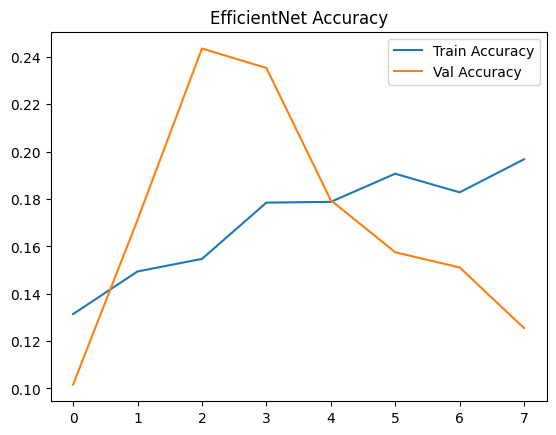

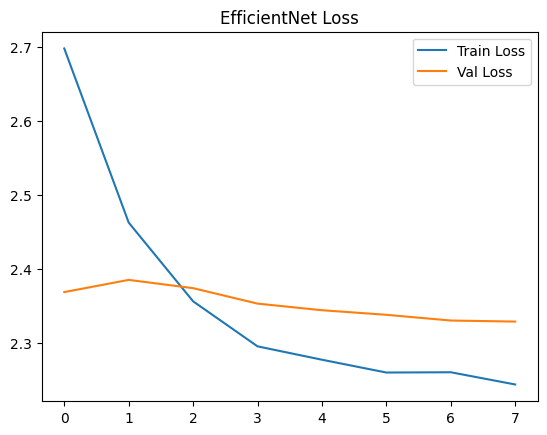

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("EfficientNet Accuracy")
plt.savefig(os.path.join(PLOT_DIR, "efficientnet_accuracy.png"))
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("EfficientNet Loss")
plt.savefig(os.path.join(PLOT_DIR, "efficientnet_loss.png"))
plt.show()


In [ ]:
best_model = tf.keras.models.load_model(MODEL_PATH)

preds = best_model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes


35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 307ms/step


In [ ]:
report = classification_report(
    y_true,
    y_pred,
    target_names=CLASS_NAMES,
    digits=4
)

print(report)

with open(os.path.join(MODEL_DIR, "efficientnet_report.txt"), "w") as f:
    f.write(report)


                                  precision    recall  f1-score   support

                     animal fish     0.2681    0.8930    0.4123       187
                animal fish bass     0.0000    0.0000    0.0000        10
   fish sea_food black_sea_sprat     0.0000    0.0000    0.0000       105
   fish sea_food gilt_head_bream     0.0000    0.0000    0.0000        94
   fish sea_food hourse_mackerel     0.0000    0.0000    0.0000        97
        fish sea_food red_mullet     0.0000    0.0000    0.0000        90
     fish sea_food red_sea_bream     0.0000    0.0000    0.0000       113
          fish sea_food sea_bass     0.0000    0.0000    0.0000        97
            fish sea_food shrimp     0.2111    0.9900    0.3480       100
fish sea_food striped_red_mullet     0.0000    0.0000    0.0000       101
             fish sea_food trout     0.0000    0.0000    0.0000        98

                        accuracy                         0.2436      1092
                       macro avg    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


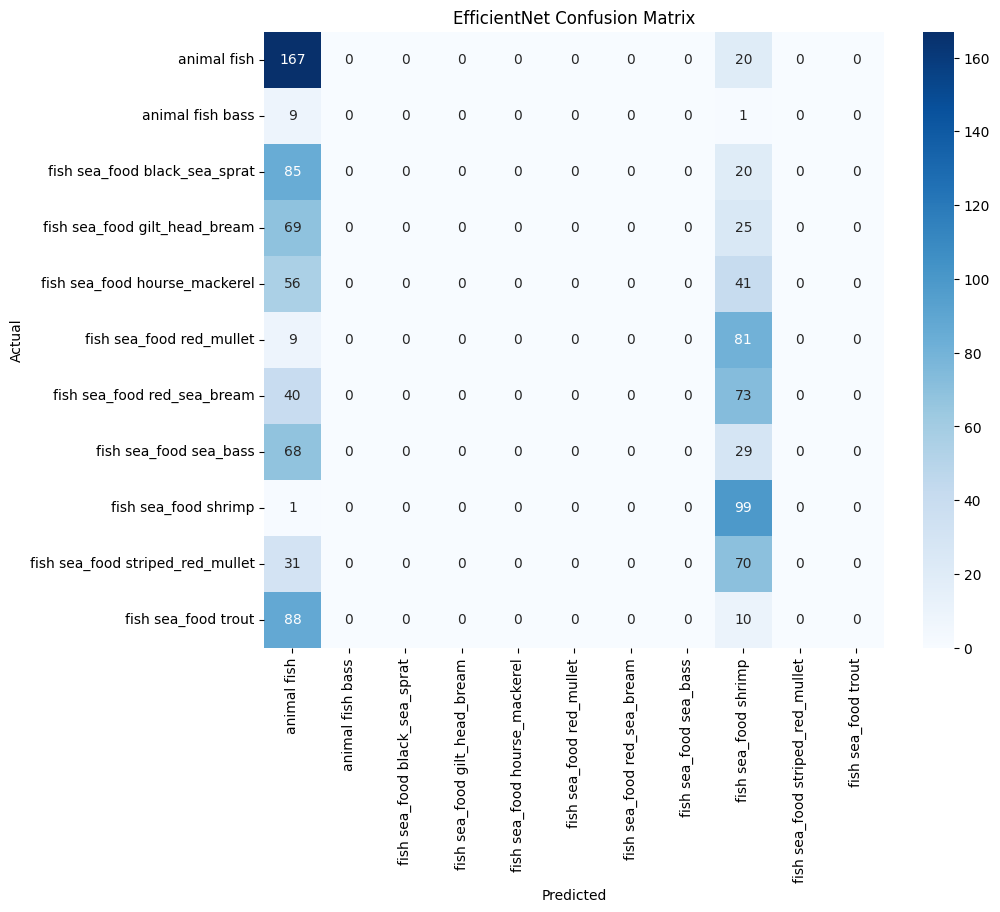

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=CLASS_NAMES,
            yticklabels=CLASS_NAMES,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("EfficientNet Confusion Matrix")
plt.savefig(os.path.join(PLOT_DIR, "efficientnet_confusion_matrix.png"))
plt.show()


In [ ]:
import os

MODEL_ROOT = "/content/drive/MyDrive/Image project/output_models"

print("Checking saved models...\n")

for model_name in os.listdir(MODEL_ROOT):
    model_dir = os.path.join(MODEL_ROOT, model_name)
    if os.path.isdir(model_dir):
        h5_files = [f for f in os.listdir(model_dir) if f.endswith(".h5")]
        if h5_files:
            print(f"{model_name}:")
            for f in h5_files:
                print(f"   ✔ {f}")
        else:
            print(f"{model_name}: ❌ No .h5 model found")


Checking saved models...

vgg16:
   ✔ vgg16_best.h5
mobilenet:
   ✔ mobilenet_best.h5


In [ ]:
import os

MODEL_DIR = "/content/drive/MyDrive/Image project"

print("Saved .h5 models:\n")

for root, dirs, files in os.walk(MODEL_DIR):
    for file in files:
        if file.endswith(".h5"):
            print(os.path.join(root, file))


Saved .h5 models:

/content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5
/content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5
/content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5
/content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5
/content/drive/MyDrive/Image project/models/efficientnet_best.h5


# Fish Image Classification workings 20.12.2025

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

REPORT_DIR = "/content/drive/MyDrive/Image project/reports"

models = [
    "cnn_scratch",
    "vgg16",
    "mobilenet",
    "efficientnet",
    "inceptionv3"
]

summary = []

for model in models:
    report_path = os.path.join(REPORT_DIR, f"{model}_report.txt")

    if not os.path.exists(report_path):
        print(f"Skipping {model} (report not found)")
        continue

    with open(report_path) as f:
        lines = f.readlines()

    for line in lines:
        if "macro avg" in line:
            parts = line.split()
            precision = float(parts[2])
            recall = float(parts[3])
            f1 = float(parts[4])

    summary.append({
        "Model": model,
        "Precision (Macro)": precision,
        "Recall (Macro)": recall,
        "F1 Score (Macro)": f1
    })

df = pd.DataFrame(summary)
df = df.sort_values(by="F1 Score (Macro)", ascending=False)

csv_path = "/content/drive/MyDrive/Image project/model_comparison.csv"
df.to_csv(csv_path, index=False)

df


Skipping cnn_scratch (report not found)
Skipping vgg16 (report not found)
Skipping efficientnet (report not found)
Skipping inceptionv3 (report not found)


,Model,Precision (Macro),Recall (Macro),F1 Score (Macro)
0,mobilenet,1.0,0.99,0.99


In [ ]:
import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Re-defining necessary variables for val_generator
DATA_DIR = "/content/drive/MyDrive/Image project"
VAL_DIR  = os.path.join(DATA_DIR, "val")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

val_datagen = ImageDataGenerator(
    rescale=1./255
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


MODEL_DIR = "/content/drive/MyDrive/Image project/models"
EVAL_DIR = "/content/drive/MyDrive/Image project/evaluation"
os.makedirs(EVAL_DIR, exist_ok=True)

model_name = "efficientnet"   # change as needed
model_path = os.path.join(MODEL_DIR, f"{model_name}_best.h5")

model = tf.keras.models.load_model(model_path)

preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_names)

with open(os.path.join(EVAL_DIR, f"{model_name}_report.txt"), "w") as f:
    f.write(report)

print(f"{model_name} report saved")

Found 1092 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 346s 10s/step
efficientnet report saved


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import pandas as pd

EVAL_DIR = "/content/drive/MyDrive/Image project/evaluation"

models = [
    "cnn_scratch",
    "vgg16",
    "mobilenet",
    "efficientnet",
    "inceptionv3"
]

rows = []

for model in models:
    path = os.path.join(EVAL_DIR, f"{model}_report.txt")

    if not os.path.exists(path):
        print(f"Skipping {model} (report not found)")
        continue

    with open(path) as f:
        for line in f:
            if "macro avg" in line:
                p, r, f1 = map(float, line.split()[2:5])
                rows.append({
                    "Model": model,
                    "Precision (Macro)": p,
                    "Recall (Macro)": r,
                    "F1 Score (Macro)": f1
                })

df = pd.DataFrame(rows).sort_values("F1 Score (Macro)", ascending=False)
df


Skipping cnn_scratch (report not found)
Skipping vgg16 (report not found)
Skipping mobilenet (report not found)
Skipping inceptionv3 (report not found)


,Model,Precision (Macro),Recall (Macro),F1 Score (Macro)
0,efficientnet,0.04,0.17,0.07


In [ ]:
import os
import shutil

TARGET_DIR = "/content/drive/MyDrive/Image project/models"
os.makedirs(TARGET_DIR, exist_ok=True)

MODEL_PATHS = {
    "cnn_scratch_best.h5": "/content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5",
    "vgg16_best.h5": "/content/drive/MyDrive/vgg16/vgg16_best.h5",
    "mobilenet_best.h5": "/content/drive/MyDrive/mobilenet/mobilenet_best.h5",
    "efficientnet_best.h5": "/content/drive/MyDrive/Image project/models/efficientnet_best.h5",
    "inceptionv3_best.h5": "/content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5"
}

for name, src in MODEL_PATHS.items():
    if os.path.exists(src):
        dst = os.path.join(TARGET_DIR, name)
        if not os.path.exists(dst):
            shutil.copy(src, dst)
            print(f"Copied: {name}")
        else:
            print(f"Already exists: {name}")
    else:
        print(f"Missing: {src}")


Copied: cnn_scratch_best.h5
Missing: /content/drive/MyDrive/vgg16/vgg16_best.h5
Missing: /content/drive/MyDrive/mobilenet/mobilenet_best.h5
Already exists: efficientnet_best.h5
Copied: inceptionv3_best.h5


In [ ]:
import os
import shutil

TARGET_DIR = "/content/drive/MyDrive/Image project/models"
os.makedirs(TARGET_DIR, exist_ok=True)

MODEL_PATHS = {
    "cnn_scratch_best.h5": "/content/drive/MyDrive/Image project/saved_models/cnn_scratch_best.h5",
    "vgg16_best.h5": "/content/drive/MyDrive/Image project/output_models/vgg16/vgg16_best.h5",
    "mobilenet_best.h5": "/content/drive/MyDrive/Image project/output_models/mobilenet/mobilenet_best.h5",
    "efficientnet_best.h5": "/content/drive/MyDrive/Image project/models/efficientnet_best.h5",
    "inceptionv3_best.h5": "/content/drive/MyDrive/Image project/inceptionv3/inceptionv3_best.h5"
}

for name, src in MODEL_PATHS.items():
    if os.path.exists(src):
        dst = os.path.join(TARGET_DIR, name)
        if not os.path.exists(dst):
            shutil.copy(src, dst)
            print(f"Copied: {name}")
        else:
            print(f"Already exists: {name}")
    else:
        print(f"Still missing (check path): {src}")


Already exists: cnn_scratch_best.h5
Copied: vgg16_best.h5
Copied: mobilenet_best.h5
Already exists: efficientnet_best.h5
Already exists: inceptionv3_best.h5


In [ ]:
!ls -lh "/content/drive/MyDrive/Image project/models"


total 511M
-rw------- 1 root root 255M Dec 20 11:51 cnn_scratch_best.h5
-rw------- 1 root root  20M Dec 19 10:50 efficientnet_best.h5
-rw------- 1 root root 1.1K Dec 19 11:03 efficientnet_report.txt
-rw------- 1 root root  91M Dec 20 11:51 inceptionv3_best.h5
-rw------- 1 root root  16M Dec 20 11:57 mobilenet_best.h5
-rw------- 1 root root 130M Dec 20 11:57 vgg16_best.h5


In [ ]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
MODEL_DIR = "/content/drive/MyDrive/Image project/models"
DATA_DIR  = "/content/drive/MyDrive/Image project/val"

IMG_SIZE = (224,224)
BATCH_SIZE = 32

# Validation Data
val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

results = []

for model_file in os.listdir(MODEL_DIR):
    if not model_file.endswith(".h5"):
        continue

    model_name = model_file.replace("_best.h5", "")
    model_path = os.path.join(MODEL_DIR, model_file)

    model = tf.keras.models.load_model(model_path)

    preds = model.predict(val_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = val_gen.classes

    report = classification_report(
        y_true, y_pred, output_dict=True
    )

    results.append({
        "Model": model_name,
        "Accuracy": report["accuracy"],
        "Precision (Macro)": report["macro avg"]["precision"],
        "Recall (Macro)": report["macro avg"]["recall"],
        "F1 Score (Macro)": report["macro avg"]["f1-score"]
    })

df = pd.DataFrame(results).sort_values("F1 Score (Macro)", ascending=False)
df


Found 1092 images belonging to 11 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step


35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 362ms/step


35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step


35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 366ms/step


,Model,Accuracy,Precision (Macro),Recall (Macro),F1 Score (Macro)
4,mobilenet,0.999084,0.999516,0.990909,0.994973
1,cnn_scratch,0.986264,0.954616,0.930240,0.937804
3,vgg16,0.983516,0.987315,0.918399,0.928550
2,inceptionv3,0.977106,0.982616,0.903546,0.909271
0,efficientnet,0.243590,0.043559,0.171186,0.069120


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision (Macro)'].plot(kind='hist', bins=20, title='Precision (Macro)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall (Macro)'].plot(kind='hist', bins=20, title='Recall (Macro)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='Precision (Macro)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision (Macro)', y='Recall (Macro)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall (Macro)', y='F1 Score (Macro)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Precision (Macro)'].plot(kind='line', figsize=(8, 4), title='Precision (Macro)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Recall (Macro)'].plot(kind='line', figsize=(8, 4), title='Recall (Macro)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Precision (Macro)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Recall (Macro)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)